# $\textit{Detección por voz de sexo}$

$\textit{By Bautista Schneeberger, Agustin Gullino y Gonzalo Linares}$

In [ ]:
import os

if not os.path.exists("VoxCeleb_gender"):
    !pip install gdown pydub librosa zipfile
    !gdown https://drive.google.com/uc?id=1V3lNnSDv71AJYIj71V4_xD0ir0DrXxEV
    !zipfile VoxCeleb_gender.zip #!tar -xf VoxCeleb_gender.zip
    !del VoxCeleb_gender.zip     #!del

else:
    print("Dataset already downloaded.")

Dataset already downloaded.


$\textit{Implementación del cálculo de los MFCCs}$

In [2]:
import librosa
import scipy.signal as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_theme()

def extract_mfcc(file_path, n_mfcc=12, win_length=320, hop_length=160):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    if sr != 16000:
        wave = librosa.resample(wave, sr, 16000)
    mfcc = librosa.feature.mfcc(y=wave, sr=16000, n_mfcc=n_mfcc, window=ss.windows.hamming, win_length=win_length, hop_length=hop_length)
    return mfcc

$\textit{Elegimos la cantidad de MFCCs y tamaño de la trama}$

In [62]:
mfcc_coeff_amount = 12
n_components = 8
window_length = int(16000*0.02)
use_delta = False
use_delta_delta = False

In [63]:
arr_mfcc = []
arr_delta = []
arr_delta_delta = []
if not os.path.exists(f"mfcc_{mfcc_coeff_amount}_{window_length}.pkl"):

    aux = []

    for (dirpath, dirnames, filenames) in os.walk("VoxCeleb_gender"):
        for filename in filenames:
            if filename.endswith(".wav"):
                filepath = dirpath + "/" + filename
                aux.append({"file": filepath, "gender": "females" if "females" in dirpath else "males"})

    df = pd.DataFrame(aux)

    df["mfcc"] = pd.Series(name="mfcc", dtype=object)

    df["delta"] = pd.Series(name="delta", dtype=object)

    df["delta_delta"] = pd.Series(name="delta_delta", dtype=object)

    for i in range(len(df)):
        mfcc_coeffs = extract_mfcc(df.loc[i, "file"], n_mfcc=mfcc_coeff_amount, win_length=window_length)
        for i, coeffs in enumerate(mfcc_coeffs):
            if np.linalg.norm(coeffs) < 1:
                mfcc_coeffs.pop(i)

        arr_mfcc.append(mfcc_coeffs.T)
        arr_delta.append(librosa.feature.delta(mfcc_coeffs.T))
        arr_delta_delta.append(librosa.feature.delta(mfcc_coeffs.T, order=2))
    df["mfcc"] = arr_mfcc
    df["delta"] = arr_delta
    df["delta_delta"] = arr_delta_delta
    df.to_pickle(f"mfcc_{mfcc_coeff_amount}_{window_length}.pkl")
else:
    print("File Found")
    df = pd.read_pickle(f"mfcc_{mfcc_coeff_amount}_{window_length}.pkl")


num_males = len(df.loc[df.gender == "males"] )           
num_females = len(df.loc[df.gender == "females"] )              

File Found


In [64]:
print("Number of males: ", num_males)
print("Number of females: ", num_females)

Number of males:  3682
Number of females:  2311


In [65]:
display(df) #Cada fila tiene los datos de un audio, cada columna mfcc contiene n_mfcc x timesteps 

,file,gender,mfcc,delta,delta_delta
0,VoxCeleb_gender/males/255.wav,males,"[[-266.89233, 79.592476, 40.56708, -20.975163,...","[[11.162823, 11.162823, 11.162823, 11.162823, ...","[[-15.880483, -15.880483, -15.880483, -15.8804..."
1,VoxCeleb_gender/males/1908.wav,males,"[[-362.22406, 65.203636, -39.06394, 3.8812165,...","[[21.94146, 21.94146, 21.94146, 21.94146, 21.9...","[[-21.030924, -21.030924, -21.030924, -21.0309..."
2,VoxCeleb_gender/males/2965.wav,males,"[[-407.10593, 87.36516, 34.33753, 24.057823, 2...","[[22.70048, 22.70048, 22.70048, 22.70048, 22.7...","[[-25.7817, -25.7817, -25.7817, -25.7817, -25...."
3,VoxCeleb_gender/males/2733.wav,males,"[[-299.1009, 129.72388, -12.729125, 0.38595515...","[[12.317674, 12.317674, 12.317674, 12.317674, ...","[[-15.790797, -15.790797, -15.790797, -15.7907..."
4,VoxCeleb_gender/males/3091.wav,males,"[[-259.80472, 116.5842, 14.4684105, 16.463356,...","[[9.69882, 9.69882, 9.69882, 9.69882, 9.69882,...","[[-13.91521, -13.91521, -13.91521, -13.91521, ..."
...,...,...,...,...,...
5988,VoxCeleb_gender/females/489.wav,females,"[[-439.62015, 102.672424, 14.096146, 10.476986...","[[22.464289, 22.464289, 22.464289, 22.464289, ...","[[-25.164944, -25.164944, -25.164944, -25.1649..."
5989,VoxCeleb_gender/females/941.wav,females,"[[-327.78085, 120.84328, 15.01547, 18.810642, ...","[[13.507515, 13.507515, 13.507515, 13.507515, ...","[[-20.440895, -20.440895, -20.440895, -20.4408..."
5990,VoxCeleb_gender/females/63.wav,females,"[[-408.27185, 154.41318, 63.678486, 16.260063,...","[[16.23507, 16.23507, 16.23507, 16.23507, 16.2...","[[-25.03768, -25.03768, -25.03768, -25.03768, ..."
5991,VoxCeleb_gender/females/1820.wav,females,"[[-365.03598, 86.970535, 39.16137, 27.662418, ...","[[18.155676, 18.155676, 18.155676, 18.155676, ...","[[-24.24508, -24.24508, -24.24508, -24.24508, ..."


$\textit{Separamos entre train y test}$

In [66]:
from sklearn.model_selection import train_test_split

#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['gender'], axis=1), df['gender'], test_size=0.2)
X_file, X_test_file = X_train["file"], X_test["file"]
X_train.drop(["file"], inplace=True, axis=1)
X_test.drop(["file"], inplace=True, axis=1)
X_test["features"] = pd.Series(name="features", dtype=object)

if use_delta and use_delta_delta:
    for i, row in X_test.iterrows():
        X_test.at[i, "features"] = np.concatenate([row["mfcc"], row["delta"], row["delta_delta"]], axis=1)

elif use_delta:
    for i, row in X_test.iterrows():
        X_test.at[i, "features"] = np.concatenate([row["mfcc"], row["delta"]], axis=1)

elif use_delta_delta:
    for i, row in X_test.iterrows():
        X_test.at[i, "features"] = np.concatenate([row["mfcc"], row["delta_delta"]], axis=1)

else:
    for i, row in X_test.iterrows():
        X_test.at[i, "features"] = row["mfcc"]

# $\textit{EDA}$

$\textit{Observamos la media de los MFCCs de cada sexo}$

In [67]:
# Get the mean mfcc coefficients for each class
mean_mfcc_males = 0
mean_mfcc_females = 0

for i, person in df.iterrows():
    for j in range(len(person["mfcc"])//mfcc_coeff_amount):
        if person["gender"] == "males":
            mean_mfcc_males += np.mean(np.array(person["mfcc"]), axis=0)/num_males
        else:
            mean_mfcc_females += np.mean(person["mfcc"], axis=0)/num_females

display(mean_mfcc_males)
display(mean_mfcc_females)

array([-19792.928  ,   6502.5703 ,    398.30542,   1422.4257 ,
         -153.47969,   -184.30815,   -579.86597,   -372.59122,
         -380.68448,   -117.35152,   -214.24802,    -80.10526],
      dtype=float32)

array([-20484.12   ,   6113.509  ,    -88.58533,   1049.0404 ,
         -688.56665,   -419.64114,   -668.59357,   -221.88902,
         -329.85168,   -211.80696,   -269.09216,   -360.506  ],
      dtype=float32)

# $\textit{GMM Model}$

In [68]:
X_male_mfcc = np.concatenate(X_train.mfcc[y_train=="males"].to_numpy(), axis=0)
X_female_mfcc = np.concatenate(X_train.mfcc[y_train=="females"].to_numpy(), axis=0)

X_male_delta = np.concatenate(X_train.delta[y_train=="males"].to_numpy(), axis=0)
X_female_delta = np.concatenate(X_train.delta[y_train=="females"].to_numpy(), axis=0)

X_male_delta_delta = np.concatenate(X_train.delta_delta[y_train=="males"].to_numpy(), axis=0)
X_female_delta_delta = np.concatenate(X_train.delta_delta[y_train=="females"].to_numpy(), axis=0)


if use_delta and use_delta_delta:
    X_male = np.concatenate([X_male_mfcc, X_male_delta, X_male_delta_delta], axis=1)
    X_female = np.concatenate([X_female_mfcc, X_female_delta, X_female_delta_delta], axis=1)

elif use_delta:
    X_male = np.concatenate([X_male_mfcc, X_male_delta], axis=1)
    X_female = np.concatenate([X_female_mfcc, X_female_delta], axis=1)

elif use_delta_delta:
    X_male = np.concatenate([X_male_mfcc, X_male_delta_delta], axis=1)
    X_female = np.concatenate([X_female_mfcc, X_female_delta_delta], axis=1)

else:
    X_male = X_male_mfcc
    X_female = X_female_mfcc



$\textit{Fit Models}$

In [69]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
import pickle
if use_delta_delta and use_delta:
    pathm = f"gmm_male_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}_D_DD.pkl"
    pathf = f"gmm_female_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}_D_DD.pkl"

elif use_delta:
    pathm = f"gmm_male_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}_D.pkl"
    pathf = f"gmm_female_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}_D.pkl"

elif use_delta_delta:
    pathm = f"gmm_male_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}_DD.pkl"
    pathf = f"gmm_female_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}_DD.pkl"

else:
    pathm = f"gmm_male_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}.pkl"
    pathf = f"gmm_female_mfcc_{mfcc_coeff_amount}_{window_length}_{n_components}.pkl"



if not os.path.exists(pathm):
    
    gmm_male = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000)
    gmm_female = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000)

    gmm_male.fit(X_male)
    gmm_female.fit(X_female)

    with open(pathm,'wb') as f:
        pickle.dump(gmm_male,f)

    with open(pathf,'wb') as f:
        pickle.dump(gmm_female,f)

else:
    print("File Found")

    with open(pathm,'rb') as f:
        gmm_male = pickle.load(f)

    with open(pathf,'rb') as f:
        gmm_female = pickle.load(f)

File Found


In [70]:
def predict_male(features):
    score = gmm_male.score_samples(features).mean() - gmm_female.score_samples(features).mean()
    return score

$\textit{Observamos la distribucion de los scores para cada trama de cada modelo}$

In [71]:
scores_gmm = pd.Series(index=y_test.index)

for index, row in X_test.iterrows():
    scores_gmm[index] = predict_male(row['features']).mean()


mean_scoresf = scores_gmm[y_test == "females"][:1000]
mean_scoresm = scores_gmm[y_test == "males"][:1000]
df_female_mean = pd.DataFrame({'score': scores_gmm[y_test == "females"], 'gender': 'females'})
df_male_mean = pd.DataFrame({'score': mean_scoresm, 'gender': 'males'})
df_scores = pd.DataFrame({'score': scores_gmm, 'gender': y_test})

display(df_scores[df_scores.gender == "males"].mean())
display(df_scores[df_scores.gender == "females"].mean())

/tmp/ipykernel_23926/750592927.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scores_gmm = pd.Series(index=y_test.index)
/tmp/ipykernel_23926/750592927.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_scores[df_scores.gender == "males"].mean())


score    0.876373
dtype: float64

/tmp/ipykernel_23926/750592927.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_scores[df_scores.gender == "females"].mean())


score   -0.877564
dtype: float64

<Axes: xlabel='score', ylabel='Density'>

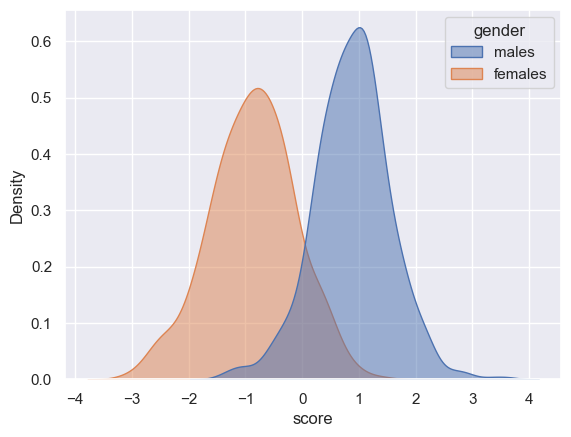

In [72]:
sns.kdeplot(data=df_scores, x='score', hue='gender', alpha=0.5, fill=True, common_norm=False)

$\textit{Probamos el modelo sobre el test}$

In [73]:
predictions = []
for index in y_test.index:
    if scores_gmm[index] > 0:
        predictions.append('males')
    else:
        predictions.append('females')

# Convert predictions to a pandas Series
predictions = pd.Series(predictions, index=y_test.index)

# Calculate the accuracy
accuracy = (predictions == y_test).mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.49%


In [74]:
predictions

1175      males
1575      males
5033      males
3047      males
5481    females
         ...   
1213      males
3629      males
4880    females
3765    females
5019    females
Length: 1199, dtype: object

In [75]:
import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(predictions == "males", y_test == "males", pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

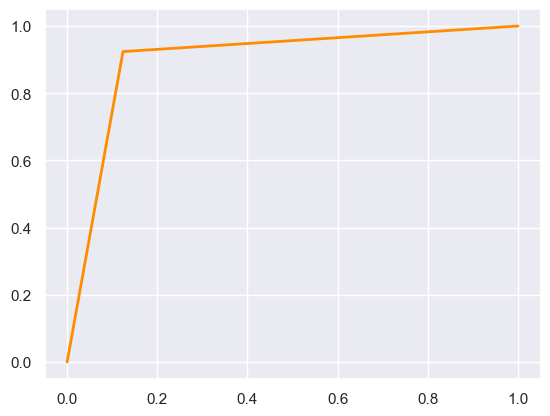

In [76]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {EER:.2f})')

In [77]:
EER

0.07607192254495154

$\textit{Probamos el modelo en tiempo real}$

In [78]:
import pyaudio
from IPython.display import update_display

Chunk = 1024 * 8
format = pyaudio.paFloat32
channels = 1
rate = 16000

In [79]:
p = pyaudio.PyAudio()

stream = p.open(
    format=format,
    channels=channels,
    rate=rate,
    input=True,
    output=True,
    frames_per_buffer=Chunk,
)
result = "male"
display(result, display_id="res")
while True:
    data = stream.read(Chunk)
    data_int = np.frombuffer(data, dtype=np.float32)
    features = librosa.feature.mfcc(y=data_int, sr=16000, n_mfcc=mfcc_coeff_amount, window=ss.windows.hamming, win_length=window_length, hop_length=window_length//2).T
    if use_delta and use_delta_delta:
        features = np.concatenate([features, librosa.feature.delta(features), librosa.feature.delta(features, order=2)], axis=1)
    elif use_delta:
        features = np.concatenate([features, librosa.feature.delta(features)], axis=1)
    elif use_delta_delta:
        features = np.concatenate([features, librosa.feature.delta(features, order=2)], axis=1)
    
    score_res = predict_male(features)
    text = f"Is a male speaking?: {score_res > 0}, with a score of {score_res}"
    update_display(text, display_id="res")



'Is a male speaking?: False, with a score of -0.7486554810369697'

KeyboardInterrupt: 